In [165]:
from scipy.io import loadmat
import numpy as np
import array_to_latex as a2l

dataset = loadmat('dataset.mat')
x = np.array(dataset['X'])
d = np.array(dataset['D'])

In [166]:
"""part a"""

k = len(x[:, 0])
wiener_W = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), d)
print('Wiener weight\n' + a2l.to_ltx(wiener_W, frmt='{:.8f}', arraytype='bmatrix', print_out=False),
      '\nshape=' + str(wiener_W.shape))
mse_wiener = np.matmul((d - np.matmul(x, wiener_W)).T, (d - np.matmul(x, wiener_W))) / (2 * k)
print('mse_wiener=', mse_wiener)

Wiener weight
\begin{bmatrix}
  1.00067810\\
  1.00061145\\
 -2.00031968
\end{bmatrix} 
shape=(3, 1)
mse_wiener= [[5.03995157e-05]]


LMS weight
\begin{bmatrix}
  1.00074855\\
  1.00082859\\
 -2.00068123
\end{bmatrix}


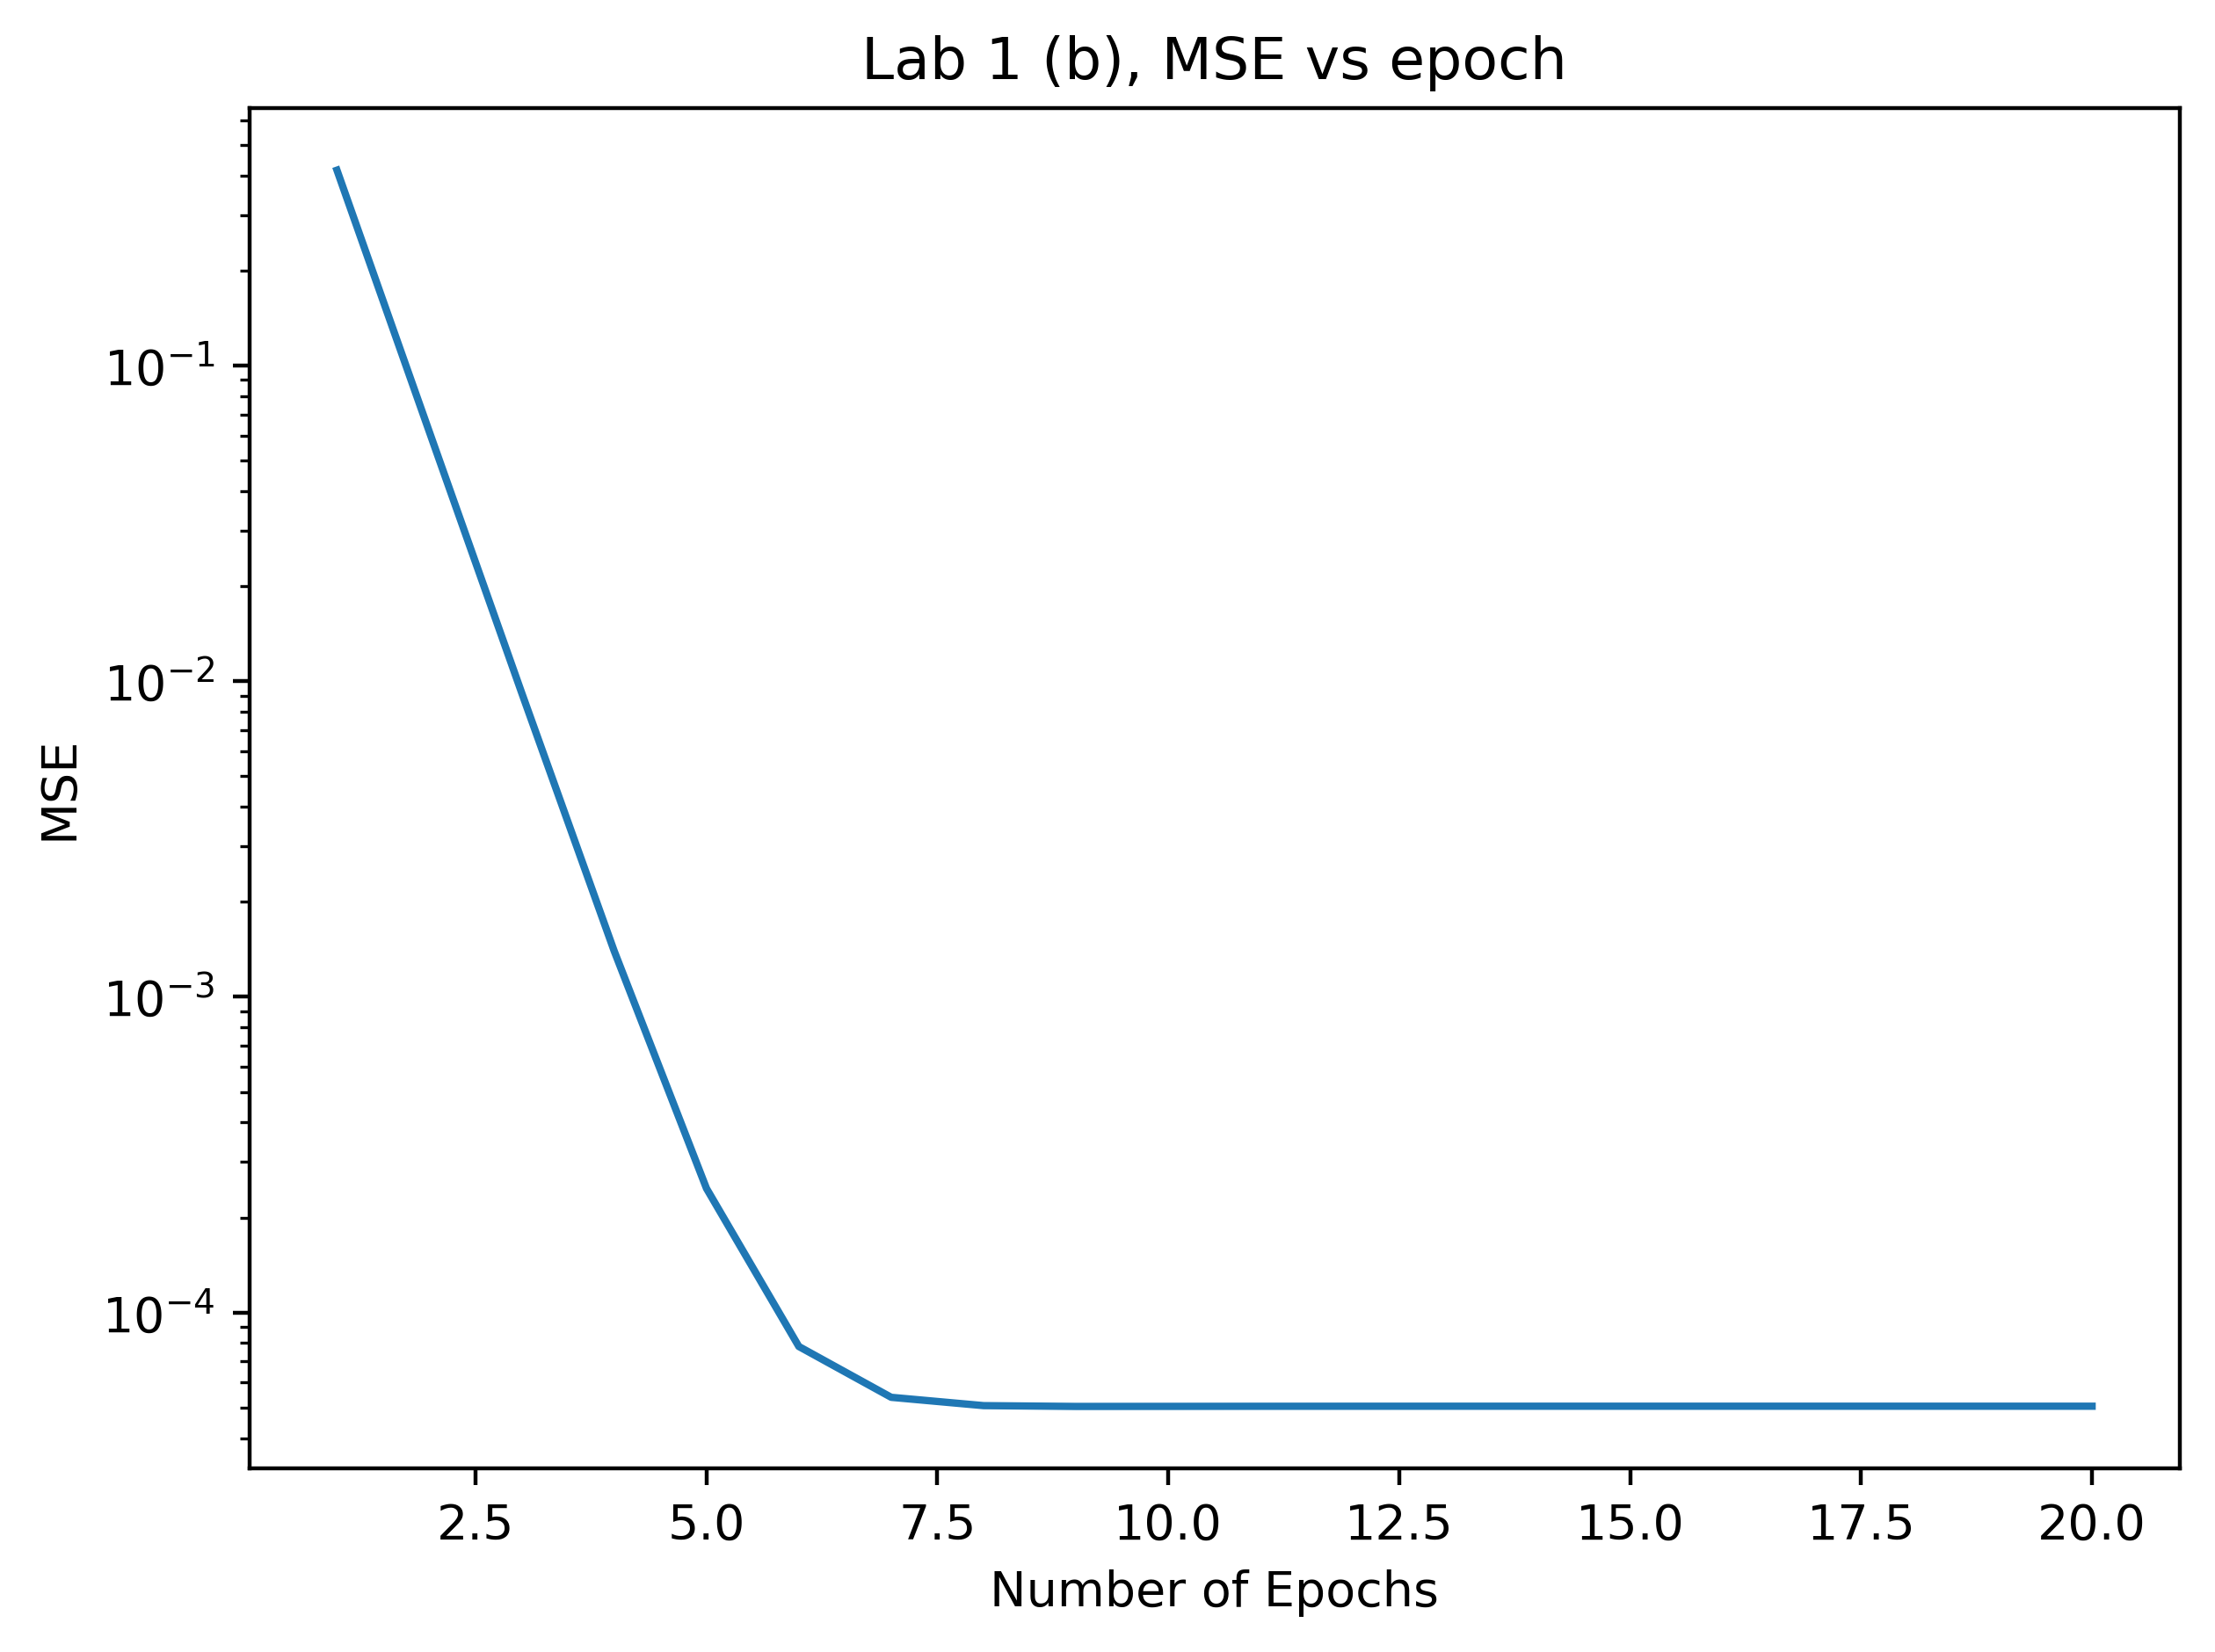

In [167]:
"""part b"""

%matplotlib inline
import matplotlib.pyplot as plt
W_0 = np.array([0, 0, 0]).reshape(-1, 1)
# W_0 = torch.tensor(W_0, dtype=torch.float64, requires_grad=True)

epochs = 20


def update_weight(w_k, r, x_k, target_k):
    # print(w_k.flatten().shape, x_k.shape)
    predicted_k = np.dot(w_k.flatten(), x_k)

    w_next = w_k.flatten() + r * x_k * (target_k.flatten() - predicted_k)
    return w_next


def run_lms(W0, e, k_, lr):
    # W0: init weights; e: epochs; k_: size of dataset
    w_k_p = W0
    mse_list = []
    for epoch in range(e):
        for idx in range(k_):
            w_k = update_weight(w_k_p, r=lr, x_k=x[idx, :], target_k=d[idx])
            w_k_p = w_k
        mse_lms = np.matmul((d.flatten() - np.matmul(x, w_k_p).T).T,
                            (d.flatten() - np.matmul(x, w_k_p).T)) / (2 * k)
        mse_list.append(mse_lms)
    return w_k_p, mse_list

w_k_prev, mse_lms_list = run_lms(W0=W_0, e=epochs, k_=k, lr=0.01)
print('LMS weight\n' + a2l.to_ltx(w_k_prev.reshape(3, 1), frmt='{:.8f}', arraytype='bmatrix', print_out=False))
# print(mse_lms_list[0].shape)
fig = plt.figure(dpi=400)
plt.semilogy(np.linspace(1, epochs, num=20), mse_lms_list)
# plt.plot(np.linspace(1, epochs, num=20), np.log10(mse_lms_list))
plt.title('Lab 1 (b), MSE vs epoch')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
fig.tight_layout()
# plt.savefig('lab1b.pdf', dpi=700, bbox_inches='tight')

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [-2.         -1.73333333 -1.46666667 -1.2        -0.93333333 -0.66666667
  -0.4        -0.13333333  0.13333333  0.4         0.66666667  0.93333333
   1.2         1.46666667  1.73333333  2.        ]
 [-2.         -1.73333333 -1.46666667 -1.2        -0.93333333 -0.66666667
  -0.4        -0.13333333  0.13333333  0.4         0.66666667  0.93333333
   1.2         1.46666667  1.73333333  2.        ]]
(3,) (3, 1)


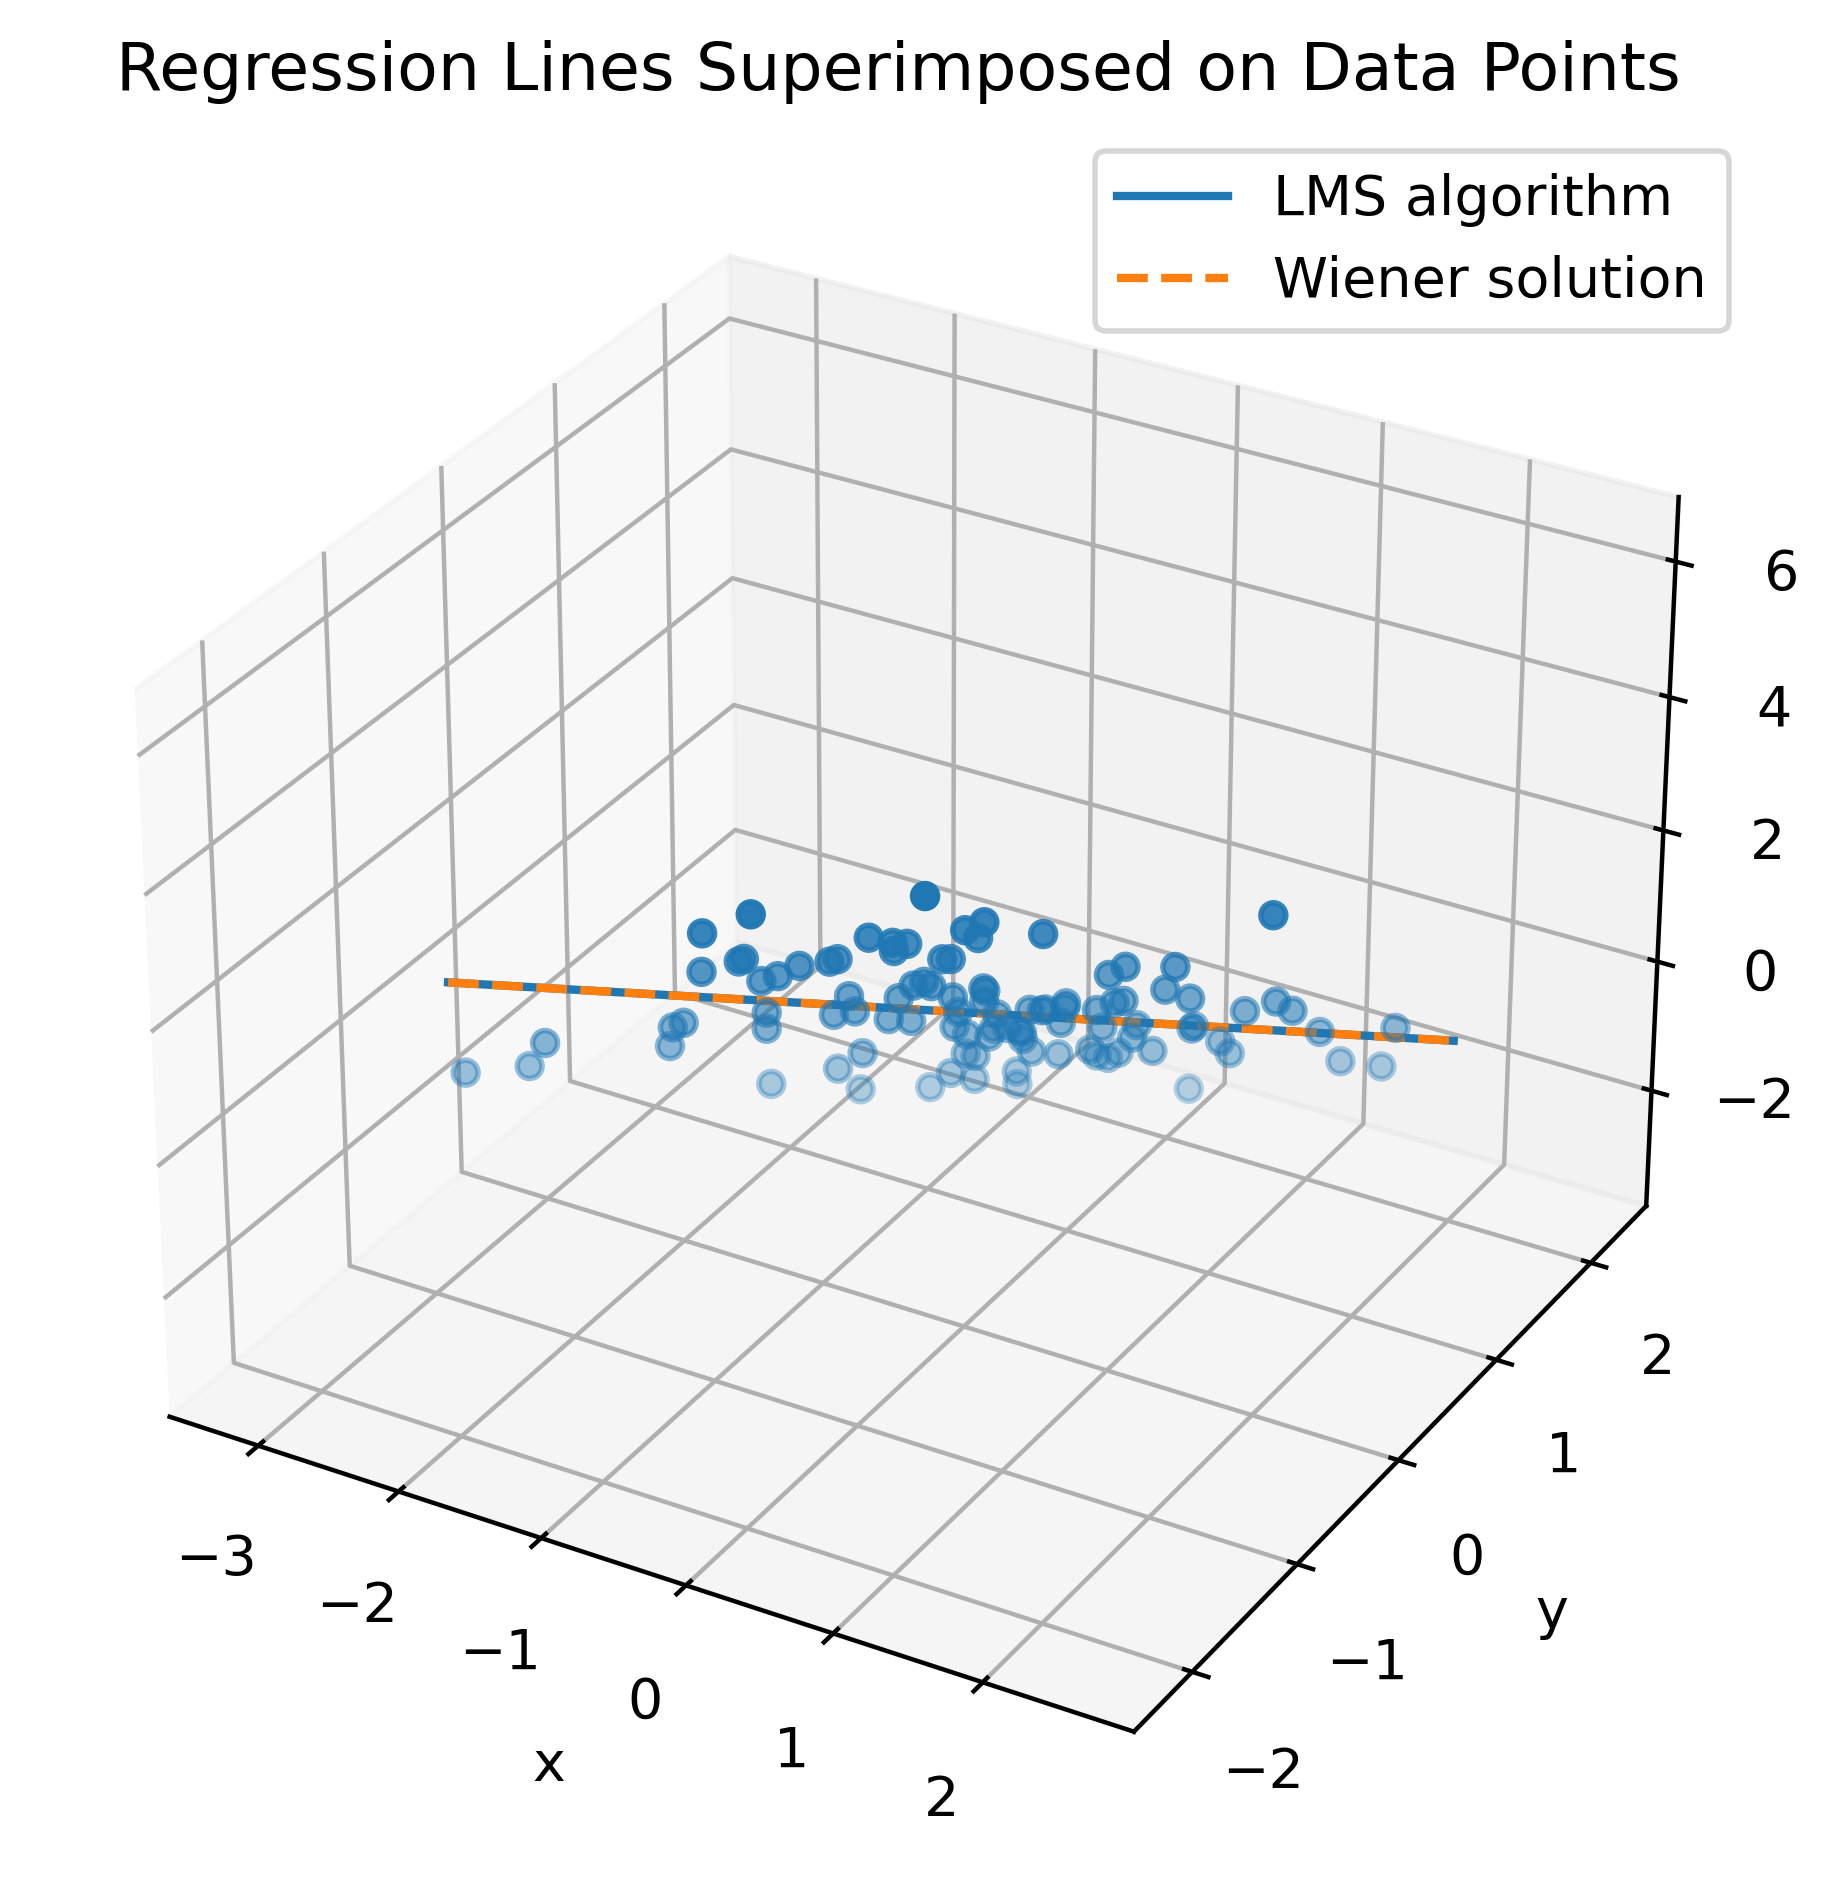

In [168]:
"""part c"""

xy_len = 16
param_end, param_start = -2, 2

param = np.linspace(param_end, param_start, num=xy_len)
ones = np.ones(xy_len)
xy = np.vstack((ones, param, param))
print(xy)

fig = plt.figure(dpi=400)
ax = plt.axes(projection='3d')
x_points = x[:, 1]
y_points = x[:, 2]
z_points = d.flatten()

z_line_iter = np.matmul(w_k_prev, xy)
print(w_k_prev.shape, wiener_W.shape)
z_line_wiener = np.matmul(wiener_W.flatten(), xy)

ax.scatter3D(x_points, y_points, z_points)
ax.plot3D(param, param, z_line_iter, label='LMS algorithm')
ax.plot3D(param, param, z_line_wiener, linestyle='dashed', label='Wiener solution')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Regression Lines Superimposed on Data Points')
fig.tight_layout()
# plt.savefig('lab1c.pdf', dpi=700, bbox_inches='tight')

The linear model fits the data quite well. The weight vector generated using the Wiener solution is very similar to the weight vector produced using the LMS algorithm.

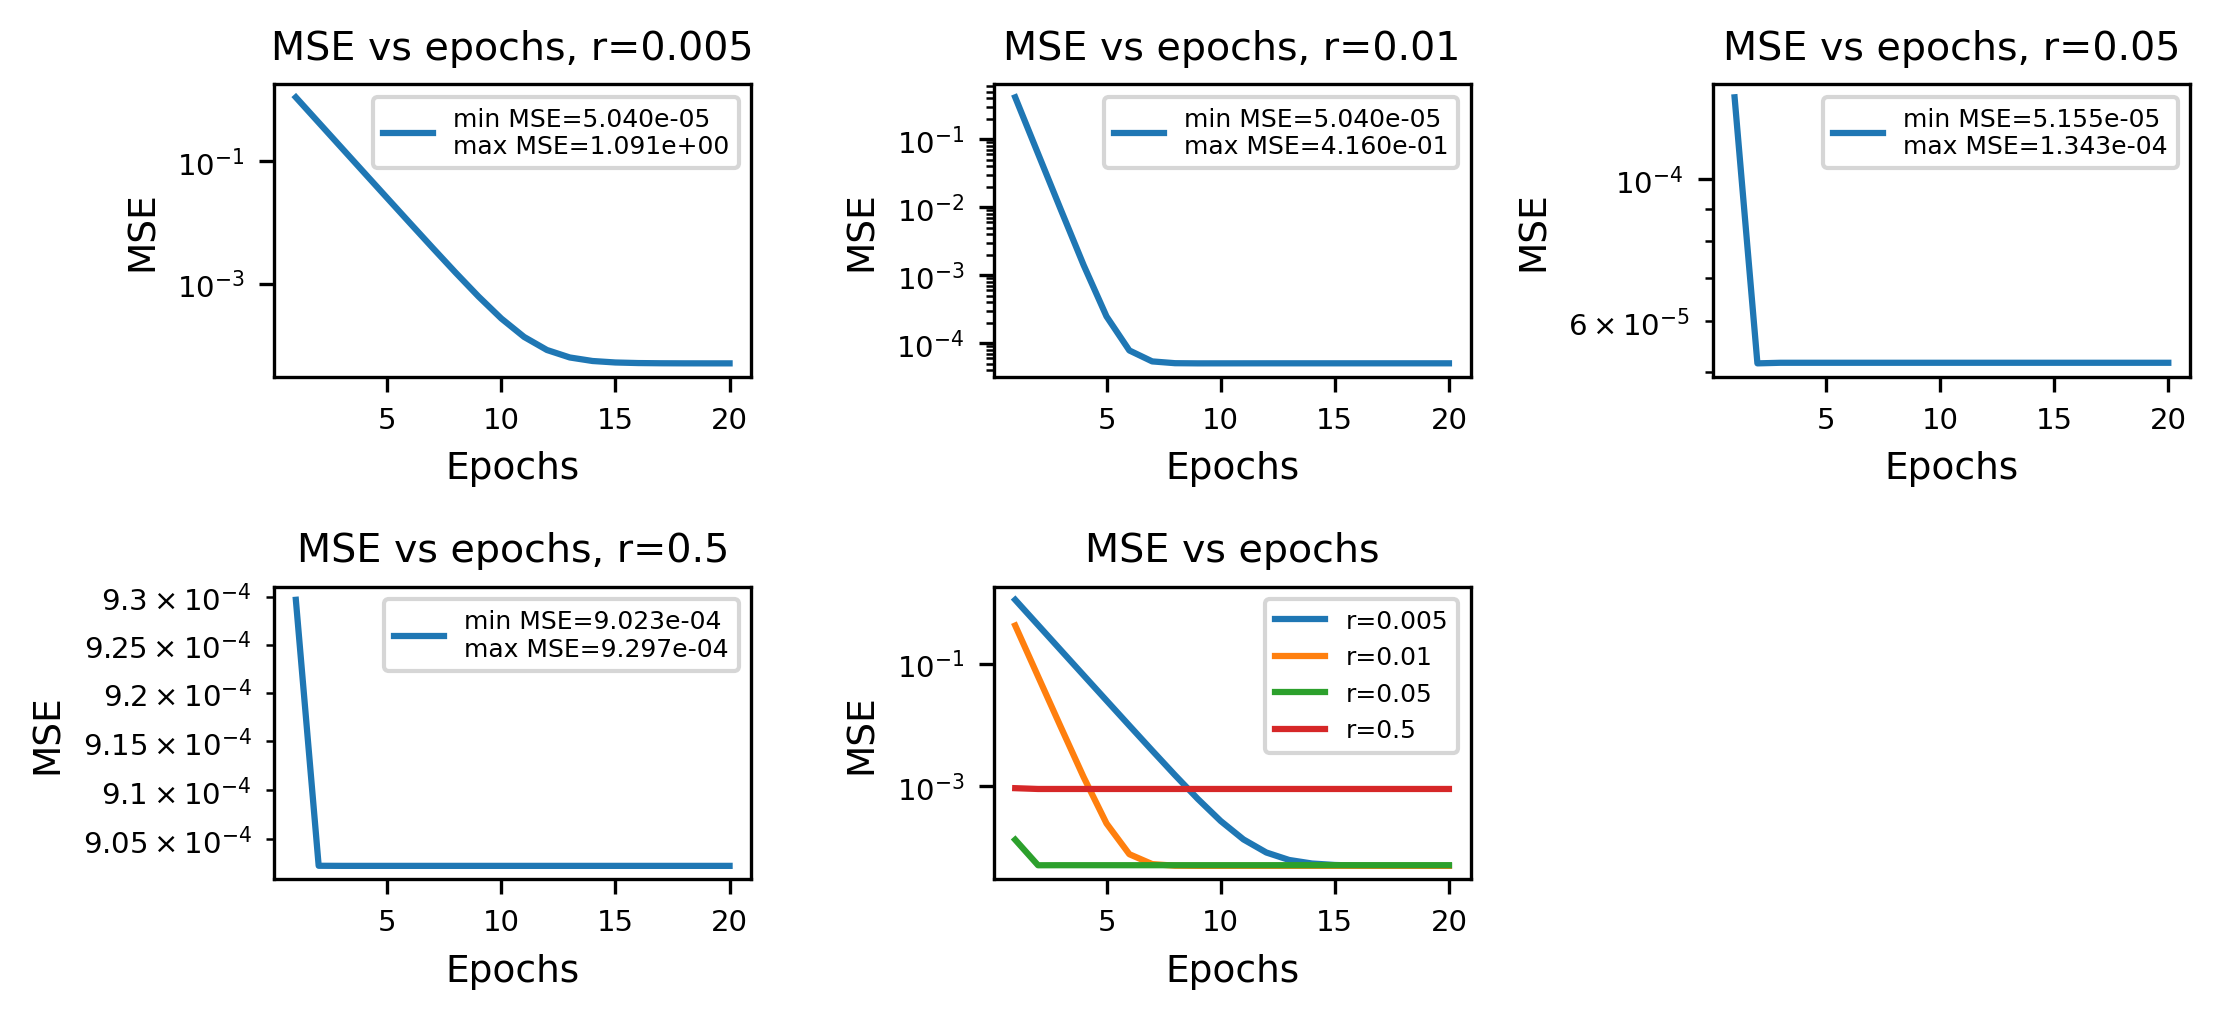

In [169]:
"""part d"""

fig, ax = plt.subplots(2, 3, dpi=300, figsize=(15/2, 7/2))
ax_new = ax.flatten()
ax_new[-1].axis('off')
epochs = 20
W_init = np.array([0, 0, 0]).reshape(-1, 1)
r_list = [0.005, 0.01, 0.05, 0.5]
for idx, r in enumerate(r_list):
    w_k_prev, mse_list = run_lms(W0=W_init, e=epochs, k_=k, lr=r)
    ax_new[idx].semilogy(np.linspace(1, epochs, num=20), mse_list,
                         label='min MSE={:.3e}\nmax MSE={:.3e}'.format(min(mse_list), max(mse_list)))
    ax_new[idx].set_title('MSE vs epochs, r={:g}'.format(r), fontsize=9.5)
    ax_new[idx].set_xlabel('Epochs', fontsize=9)
    ax_new[idx].set_ylabel('MSE', fontsize=9)
    ax_new[idx].legend(fontsize=6)
    ax_new[idx].tick_params(axis='x', which='both', labelsize=7)
    ax_new[idx].tick_params(axis='y', which='both', labelsize=7)

    ax_new[-2].semilogy(np.linspace(1, epochs, num=20), mse_list, label='r={:g}'.format(r))
ax_new[-2].set_title('MSE vs epochs', fontsize=9.5)
ax_new[-2].set_xlabel('Epochs', fontsize=9)
ax_new[-2].set_ylabel('MSE', fontsize=9)
ax_new[-2].legend(fontsize=6)
ax_new[-2].tick_params(axis='x', which='both', labelsize=7)
ax_new[-2].tick_params(axis='y', which='both', labelsize=7)
# fig.suptitle('MSE vs Epochs for Different Values of r')
fig.tight_layout()
# plt.savefig('lab1d_four.pdf', dpi=700, bbox_inches='tight')

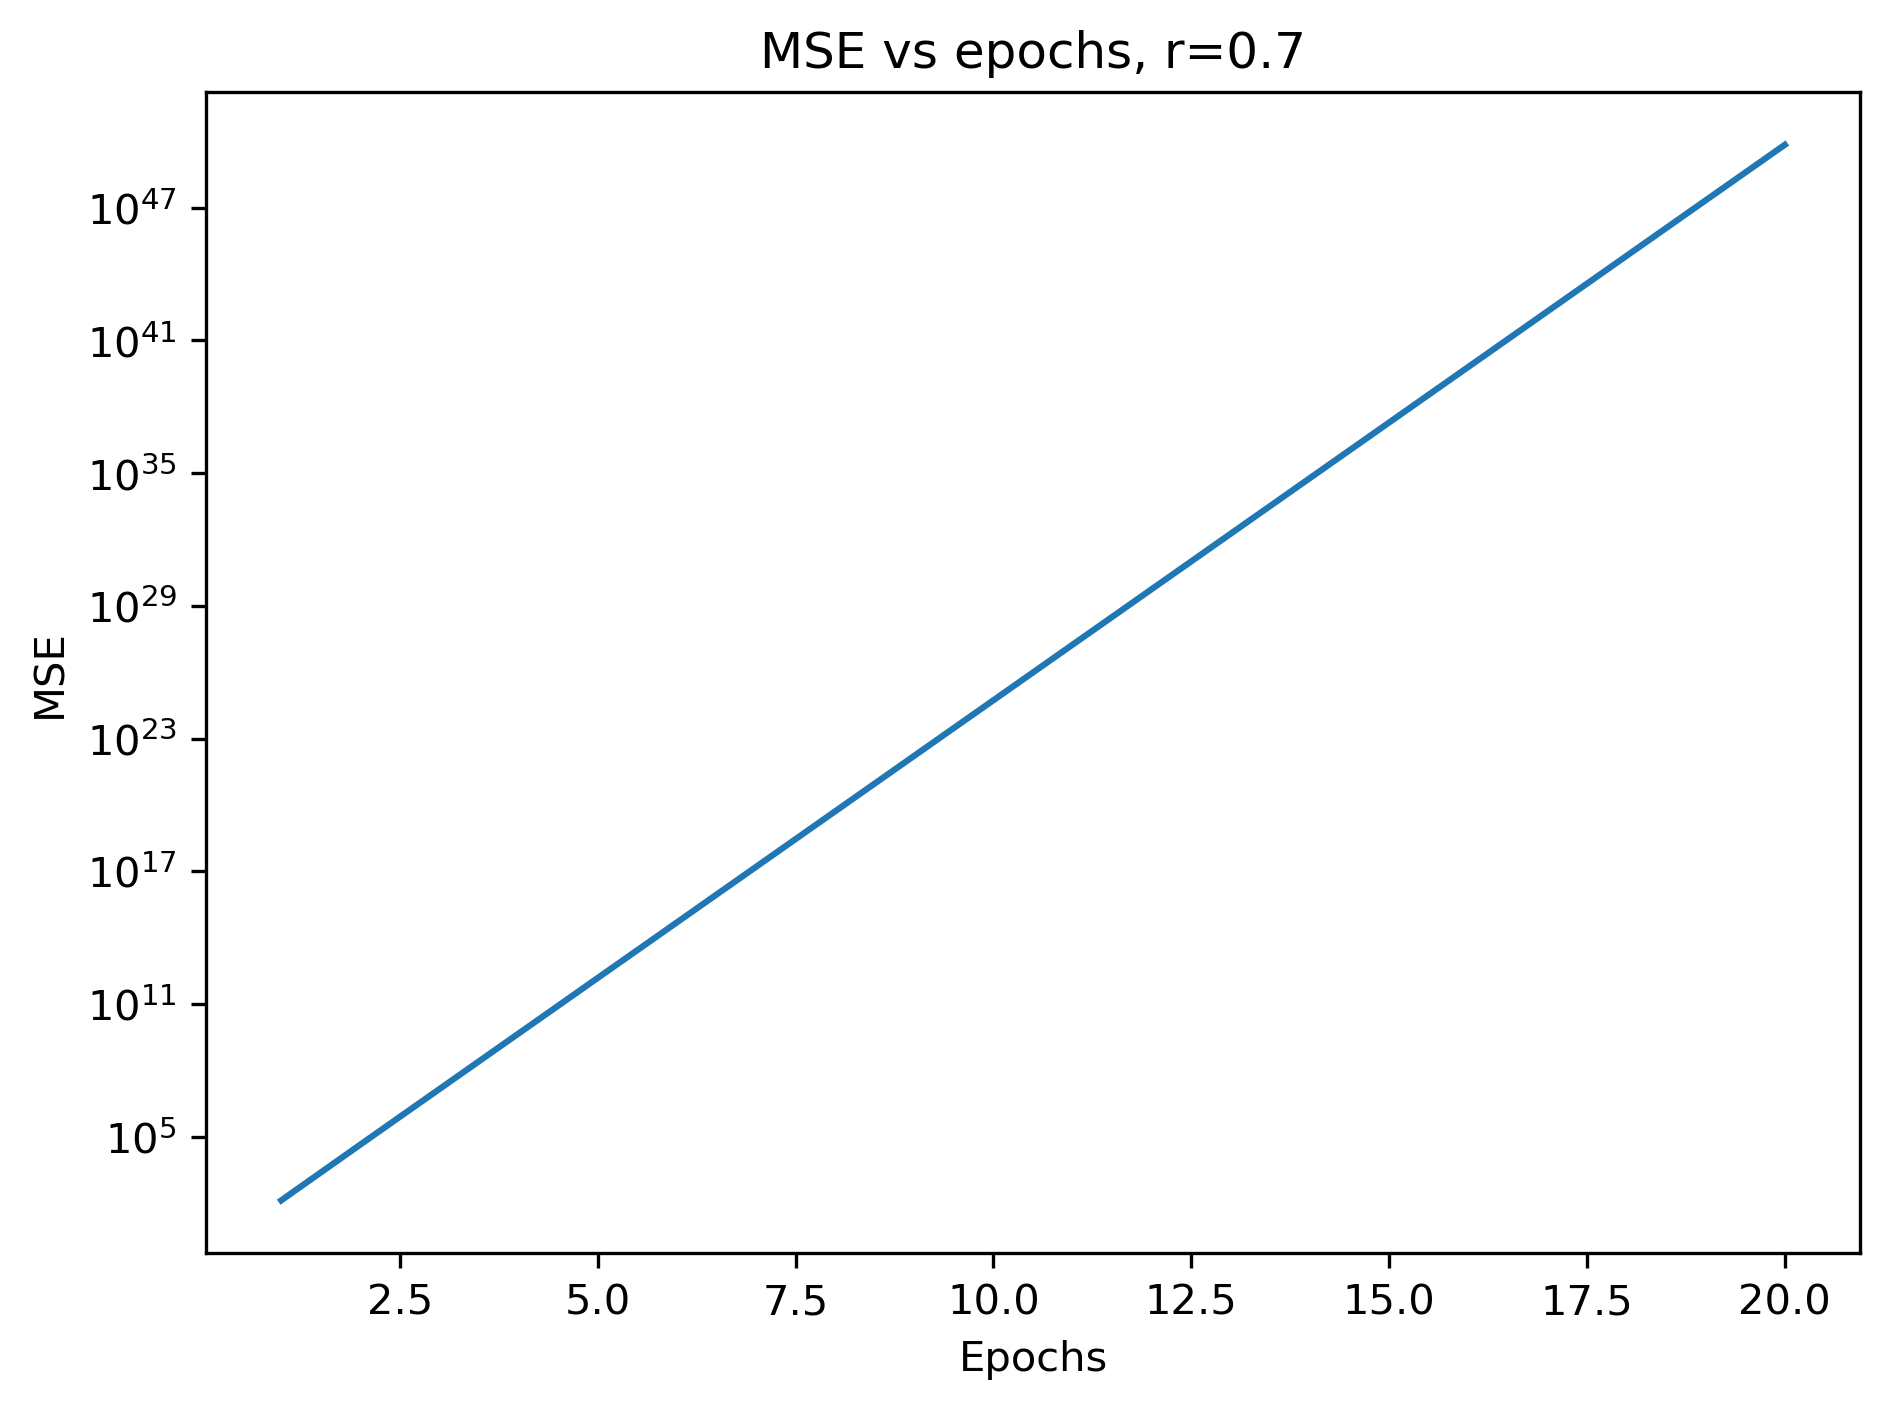

In [170]:
r = 0.7
fig, ax = plt.subplots(1, 1, dpi=300)
w_k_prev, mse_list = run_lms(W0=W_init, e=epochs, k_=k, lr=r)
ax.semilogy(np.linspace(1, epochs, num=20), mse_list)
ax.set_title('MSE vs epochs, r={:g}'.format(r))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
fig.tight_layout()
# plt.savefig('lab1d_inf.pdf', dpi=700, bbox_inches='tight')

When learning rate is too low (0.005), the algorithm approaches the best solution very slowly since the weights vector can only change a little bit each time a data point is fed into the algorithm. We can see that the MSE after the first epoch is much higher for r=0.005 than it is for r=0.5. Although we get a pretty small MSE after the first epoch when learning rate is high, the LMS algorithm is unable to further decrease the MSE by much after the first couple epochs. This results in a suboptimal final weight when r is too high, since the high learning rate causes the algorithm to overshoot and oscillate around the optimal solution. When learning rate is very high (e.g., lr = 0.7), the algorithm completely misses the global minimum and the MSE shoots off to infinity. So, when lr is too small, the training speed is too low, and when lr is too large, the training quality decreases (i.e., higher MSE).